In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [2]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# 讀取數據
df = pd.read_csv("Cabbage_weather_price.csv")

# ✅ 轉換 ObsTime 為 datetime
df["ObsTime"] = pd.to_datetime(df["ObsTime"], format="%Y/%m/%d")

print("=== 數據基本信息 ===")
print(f"數據形狀: {df.shape}")
print(f"時間範圍: {df['ObsTime'].min().date()} 到 {df['ObsTime'].max().date()}")
print("\n數據前5行:")
print(df.head())

print("\n=== 數據類型與缺失值檢查 ===")
print(df.info())
print("\n缺失值統計:")
print(df.isnull().sum())

print("\n=== 數值型變數描述性統計 ===")
print(df.describe())


=== 數據基本信息 ===
數據形狀: (365, 9)
時間範圍: 2024-01-01 到 2024-12-31

數據前5行:
     ObsTime      StnPres  Temperature         RH        WS     Precp  \
0 2024-01-01  1002.256858    16.937810  73.833344  2.578272  0.023611   
1 2024-01-02  1000.071372    17.352462  77.081207  1.404666  0.000000   
2 2024-01-03  1000.967058    16.259082  78.350365  3.044548  0.390670   
3 2024-01-04  1001.986184    15.198044  72.991178  1.576658  0.000000   
4 2024-01-05  1001.936560    16.377503  79.120694  1.278478  0.000000   

    GloblRad  typhoon  Cabbage price  
0  18.246640        0       9.475000  
1  18.300321        0       9.018750  
2  17.804985        0       8.342857  
3  16.893827        0       7.584615  
4  17.527979        0       8.575294  

=== 數據類型與缺失值檢查 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ObsTime        365 non-null 

In [4]:
df['ObsTime'].max()


Timestamp('2024-12-31 00:00:00')

In [5]:
import pandas as pd

# 讀取最新上傳檔案
df = pd.read_csv("Cabbage_weather_price.csv")

# 轉為 datetime 格式
df["ObsTime"] = pd.to_datetime(df["ObsTime"], errors="coerce", format="%Y/%m/%d")

# 顯示最早與最晚日期
print("最早日期:", df["ObsTime"].min())
print("最晚日期:", df["ObsTime"].max())

最早日期: 2024-01-01 00:00:00
最晚日期: 2024-12-31 00:00:00


In [6]:
# =============================================================================
# 時間特徵工程
# =============================================================================

import numpy as np

print("\n=== 時間特徵工程 ===")

# 轉換時間格式
df['ObsTime'] = pd.to_datetime(df['ObsTime'])

# 提取時間特徵
df['year'] = df['ObsTime'].dt.year
df['month'] = df['ObsTime'].dt.month
df['day'] = df['ObsTime'].dt.day
df['dayofweek'] = df['ObsTime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['dayofyear'] = df['ObsTime'].dt.dayofyear
df['quarter'] = df['ObsTime'].dt.quarter

# 季節特徵 (台灣氣候分季)
def get_season(month):
    if month in [12, 1, 2]:
        return 0  # 冬季
    elif month in [3, 4, 5]:
        return 1  # 春季
    elif month in [6, 7, 8]:
        return 2  # 夏季
    else:
        return 3  # 秋季

df['season'] = df['month'].apply(get_season)

# 週期性特徵 (捕捉季節性模式)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
df['dayofyear_sin'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
df['dayofyear_cos'] = np.cos(2 * np.pi * df['dayofyear'] / 365)

# 是否週末
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

print("時間特徵創建完成!")
print("新增特徵:", ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter', 'season', 
                 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'dayofyear_sin', 'dayofyear_cos', 'is_weekend'])


=== 時間特徵工程 ===
時間特徵創建完成!
新增特徵: ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter', 'season', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'dayofyear_sin', 'dayofyear_cos', 'is_weekend']


In [7]:
# =============================================================================
# 氣象特徵工程
# =============================================================================

print("\n=== 氣象特徵工程 ===")

# Typhoon one-hot encoding (已經是0/1，直接重命名)
df['is_typhoon'] = df['typhoon']
print(f"颱風天數: {df['is_typhoon'].sum()} 天 ({df['is_typhoon'].mean()*100:.1f}%)")

# 溫度相關特徵
df['temp_squared'] = df['Temperature'] ** 2  # 非線性關係
df['temp_cubed'] = df['Temperature'] ** 3

# 溫度分級
df['temp_quantile'] = pd.qcut(df['Temperature'], q=4, labels=[0, 1, 2, 3])
df['is_hot'] = (df['Temperature'] > df['Temperature'].quantile(0.75)).astype(int)
df['is_cold'] = (df['Temperature'] < df['Temperature'].quantile(0.25)).astype(int)

# 濕度特徵
df['humidity_level'] = pd.cut(df['RH'], bins=[0, 60, 80, 100], labels=[0, 1, 2])  # 低、中、高濕度

# 風速與濕度交互作用
df['humid_wind_interaction'] = df['RH'] * df['WS']
df['temp_humid_interaction'] = df['Temperature'] * df['RH']

# 降雨量特徵
df['rain_level'] = pd.cut(df['Precp'], 
                         bins=[-0.1, 0, 1, 5, float('inf')], 
                         labels=[0, 1, 2, 3])  # 無雨、小雨、中雨、大雨

df['has_rain'] = (df['Precp'] > 0).astype(int)
df['log_precp'] = np.log1p(df['Precp'])  # log(1+x) 處理0值

# 日照特徵
df['sunlight_level'] = pd.qcut(df['GloblRad'], q=3, labels=[0, 1, 2])

# 氣壓特徵
df['pressure_ma_7'] = df['StnPres'].rolling(window=7, center=True).mean()
df['pressure_anomaly'] = np.abs(df['StnPres'] - df['pressure_ma_7'])

# 極端天氣指標
df['extreme_temp'] = ((df['Temperature'] > df['Temperature'].quantile(0.95)) | 
                     (df['Temperature'] < df['Temperature'].quantile(0.05))).astype(int)

df['extreme_rain'] = (df['Precp'] > df['Precp'].quantile(0.95)).astype(int)

df['extreme_weather'] = (
    (df['is_typhoon'] == 1) |
    (df['extreme_temp'] == 1) |
    (df['extreme_rain'] == 1)
).astype(int)

print("氣象特徵創建完成!")


=== 氣象特徵工程 ===
颱風天數: 18 天 (4.9%)
氣象特徵創建完成!


In [8]:
# =============================================================================
# 滯後特徵 (Lag Features)
# =============================================================================

print("\n=== 創建滯後特徵 ===")

# 價格滯後特徵（重要！）
for lag in [1, 2, 3, 7, 14, 30]:
    df[f'price_lag_{lag}'] = df['Cabbage price'].shift(lag)

# 氣象滯後特徵
weather_cols = ['Temperature', 'RH', 'Precp', 'GloblRad', 'WS']
for col in weather_cols:
    for lag in [1, 3, 7]:
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)

print("滯後特徵創建完成!")


=== 創建滯後特徵 ===
滯後特徵創建完成!


In [9]:
# =============================================================================
# 滾動統計特徵
# =============================================================================

print("\n=== 創建滾動統計特徵 ===")

# 移動平均
for window in [3, 7, 14, 30]:
    df[f'price_ma_{window}'] = df['Cabbage price'].rolling(window).mean()
    df[f'temp_ma_{window}'] = df['Temperature'].rolling(window).mean()
    df[f'rain_sum_{window}'] = df['Precp'].rolling(window).sum()
    df[f'humid_ma_{window}'] = df['RH'].rolling(window).mean()

# 移動標準差（波動性）
for window in [7, 14, 30]:
    df[f'price_volatility_{window}d'] = df['Cabbage price'].rolling(window).std()
    df[f'temp_volatility_{window}d'] = df['Temperature'].rolling(window).std()

# 趨勢特徵
df['price_trend_7d'] = df['Cabbage price'] - df['price_ma_7']
df['price_trend_14d'] = df['Cabbage price'] - df['price_ma_14']

# 價格變化率
for lag in [1, 3, 7]:
    df[f'price_pct_change_{lag}d'] = df['Cabbage price'].pct_change(lag)

print("滾動統計特徵創建完成!")


=== 創建滾動統計特徵 ===
滾動統計特徵創建完成!


In [10]:
# =============================================================================
# 相關性分析
# =============================================================================

print("\n=== 相關性分析 ===")

# 選擇原始數值型特徵進行相關性分析
original_features = ['StnPres', 'Temperature', 'RH', 'WS', 'Precp', 'GloblRad', 'typhoon', 'Cabbage price']
corr_matrix = df[original_features].corr()

print("相關性矩陣:")
print(corr_matrix.round(3))

# 與高麗菜價格的相關性
price_corr = corr_matrix['Cabbage price'].drop('Cabbage price').sort_values(key=abs, ascending=False)
print(f"\n與高麗菜價格相關性排序:")
for feature, corr in price_corr.items():
    strength = ""
    if abs(corr) >= 0.7:
        strength = "很強"
    elif abs(corr) >= 0.5:
        strength = "強"
    elif abs(corr) >= 0.3:
        strength = "中等"
    elif abs(corr) >= 0.1:
        strength = "弱"
    else:
        strength = "很弱"
    
    direction = "正相關" if corr > 0 else "負相關"
    print(f"{feature:12} {corr:6.3f} ({strength} {direction})")


=== 相關性分析 ===
相關性矩陣:
               StnPres  Temperature     RH     WS  Precp  GloblRad  typhoon  \
StnPres          1.000       -0.161  0.167  0.055 -0.330    -0.069   -0.208   
Temperature     -0.161        1.000  0.248 -0.409  0.102     0.577    0.100   
RH               0.167        0.248  1.000  0.041  0.329     0.009    0.221   
WS               0.055       -0.409  0.041  1.000  0.407    -0.398    0.346   
Precp           -0.330        0.102  0.329  0.407  1.000    -0.138    0.450   
GloblRad        -0.069        0.577  0.009 -0.398 -0.138     1.000   -0.106   
typhoon         -0.208        0.100  0.221  0.346  0.450    -0.106    1.000   
Cabbage price   -0.121        0.476  0.184 -0.023  0.132     0.038    0.179   

               Cabbage price  
StnPres               -0.121  
Temperature            0.476  
RH                     0.184  
WS                    -0.023  
Precp                  0.132  
GloblRad               0.038  
typhoon                0.179  
Cabbage price     


=== 創建視覺化圖表 ===


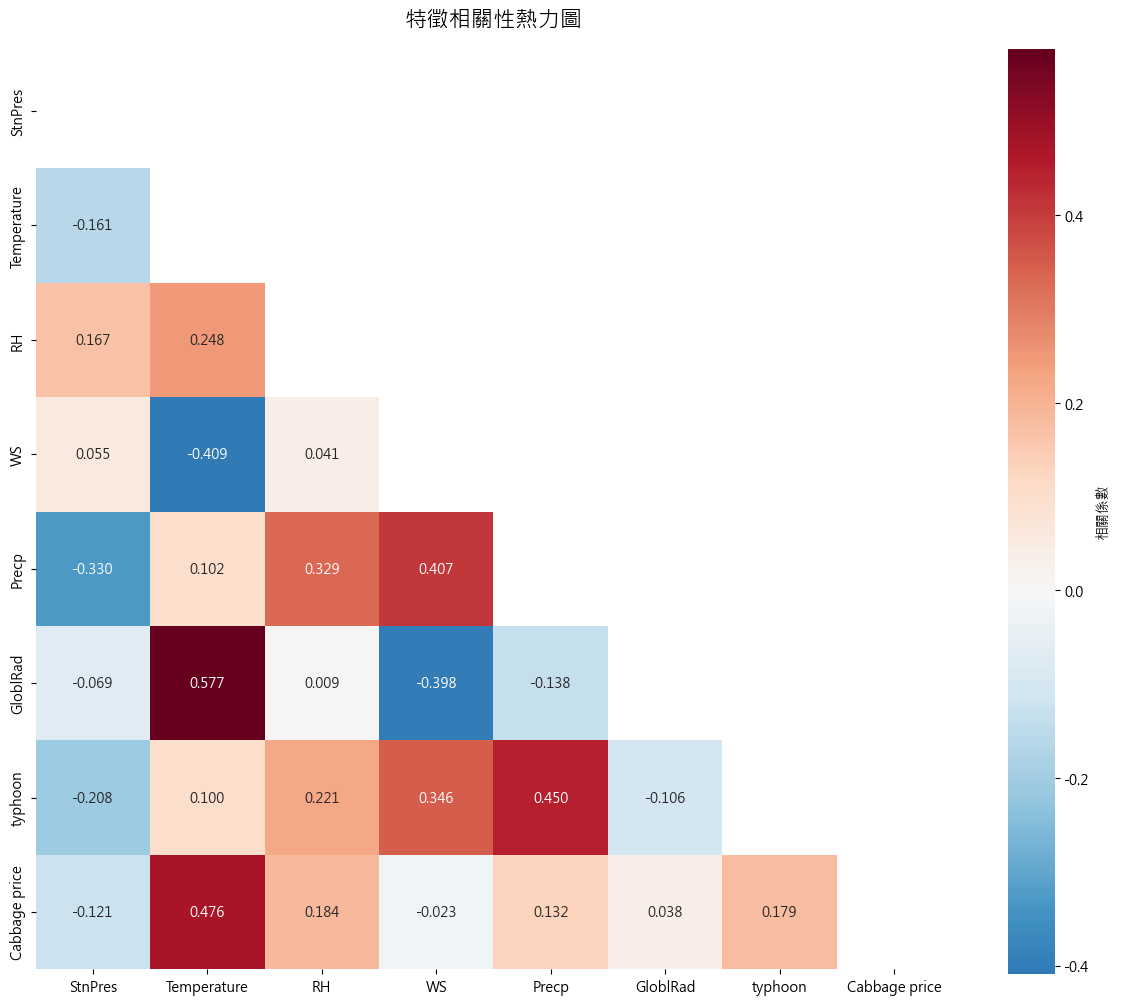

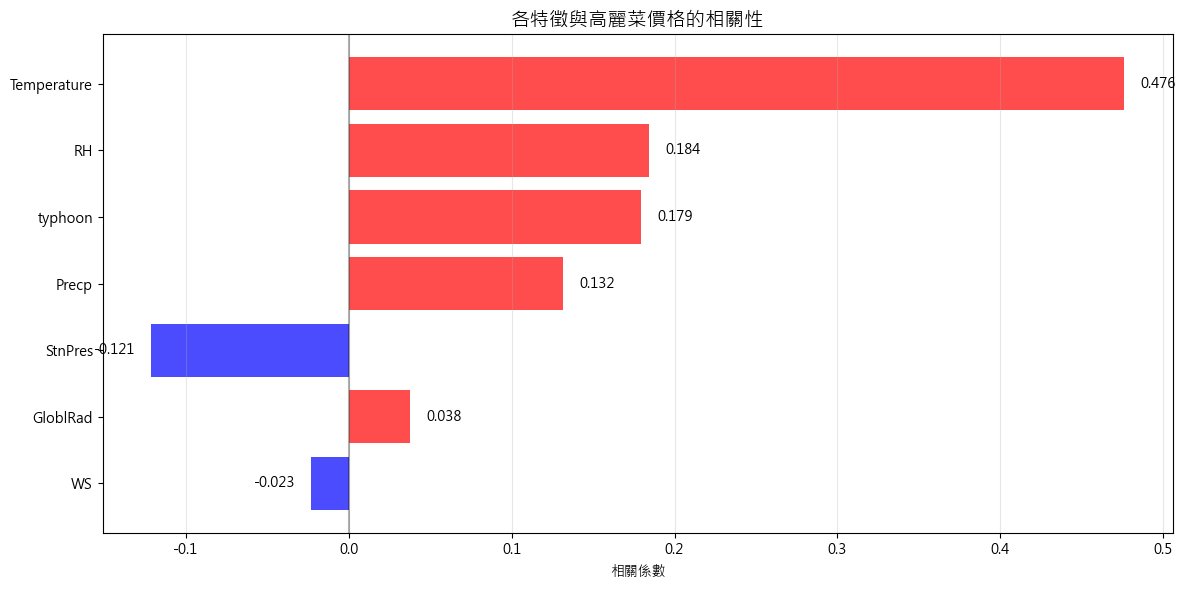

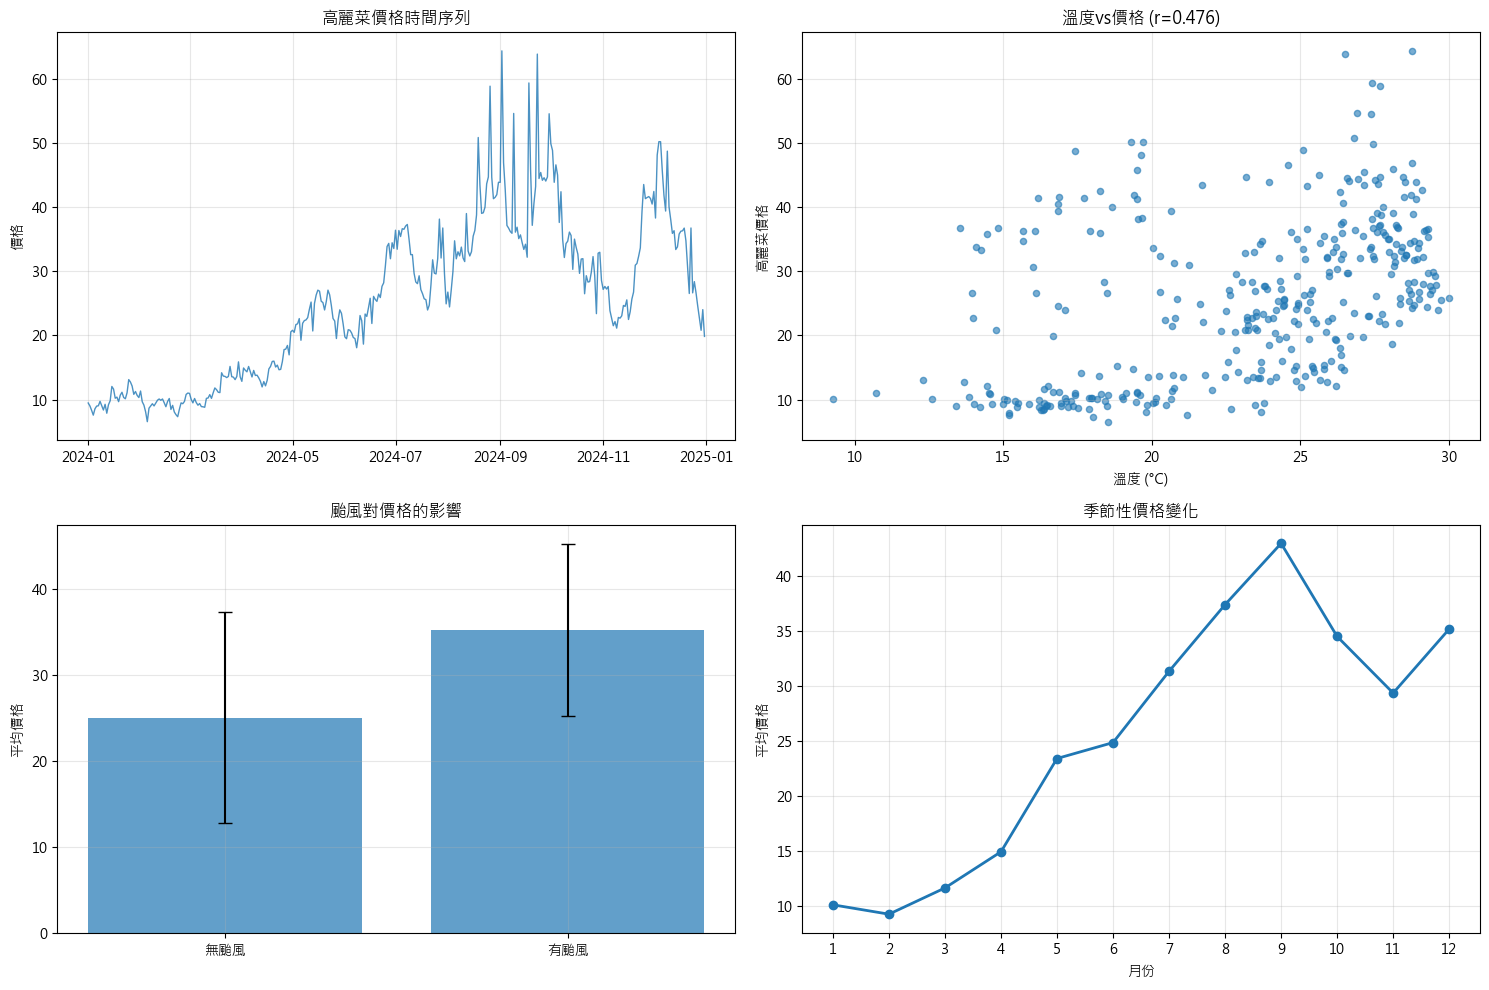

In [11]:
print("\n=== 創建視覺化圖表 ===")

# 1. 相關性熱力圖
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': '相關係數'})
plt.title('特徵相關性熱力圖', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 2. 與價格相關性條形圖
plt.figure(figsize=(12, 6))
price_corr_abs = price_corr.abs().sort_values(ascending=True)
colors = ['red' if x > 0 else 'blue' for x in price_corr[price_corr_abs.index]]
bars = plt.barh(range(len(price_corr_abs)), price_corr[price_corr_abs.index], color=colors, alpha=0.7)

plt.yticks(range(len(price_corr_abs)), price_corr_abs.index)
plt.xlabel('相關係數')
plt.title('各特徵與高麗菜價格的相關性', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# 添加數值標籤
for i, (bar, value) in enumerate(zip(bars, price_corr[price_corr_abs.index])):
    plt.text(value + 0.01 if value > 0 else value - 0.01, 
             i, f'{value:.3f}', 
             va='center', ha='left' if value > 0 else 'right')

plt.tight_layout()
plt.show()

# 3. 價格時間序列圖
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 價格時間序列
axes[0,0].plot(df['ObsTime'], df['Cabbage price'], linewidth=1, alpha=0.8)
axes[0,0].set_title('高麗菜價格時間序列')
axes[0,0].set_ylabel('價格')
axes[0,0].grid(True, alpha=0.3)

# 溫度vs價格
axes[0,1].scatter(df['Temperature'], df['Cabbage price'], alpha=0.6, s=20)
axes[0,1].set_xlabel('溫度 (°C)')
axes[0,1].set_ylabel('高麗菜價格')
axes[0,1].set_title(f'溫度vs價格 (r={corr_matrix.loc["Temperature", "Cabbage price"]:.3f})')
axes[0,1].grid(True, alpha=0.3)

# 颱風影響
typhoon_price = df.groupby('typhoon')['Cabbage price'].agg(['mean', 'std']).reset_index()
axes[1,0].bar(['無颱風', '有颱風'], typhoon_price['mean'], 
              yerr=typhoon_price['std'], capsize=5, alpha=0.7)
axes[1,0].set_title('颱風對價格的影響')
axes[1,0].set_ylabel('平均價格')
axes[1,0].grid(True, alpha=0.3)

# 季節性分析
seasonal_price = df.groupby('month')['Cabbage price'].mean()
axes[1,1].plot(seasonal_price.index, seasonal_price.values, marker='o', linewidth=2)
axes[1,1].set_xlabel('月份')
axes[1,1].set_ylabel('平均價格')
axes[1,1].set_title('季節性價格變化')
axes[1,1].set_xticks(range(1, 13))
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
# =============================================================================
# 多重共線性檢測
# =============================================================================

print("\n=== 多重共線性檢測 ===")

# 找出強相關的特徵對 (排除與目標變數的相關性)
strong_correlations = []
feature_cols = [col for col in original_features if col != 'Cabbage price']

for i in range(len(feature_cols)):
    for j in range(i+1, len(feature_cols)):
        corr_val = corr_matrix.loc[feature_cols[i], feature_cols[j]]
        if abs(corr_val) > 0.4:  # 閾值可調整
            strong_correlations.append({
                'feature1': feature_cols[i],
                'feature2': feature_cols[j],
                'correlation': corr_val
            })

if strong_correlations:
    print("發現的多重共線性問題 (|r| > 0.4):")
    for item in sorted(strong_correlations, key=lambda x: abs(x['correlation']), reverse=True):
        print(f"{item['feature1']} - {item['feature2']}: {item['correlation']:.3f}")
else:
    print("未發現嚴重的多重共線性問題")


=== 多重共線性檢測 ===
發現的多重共線性問題 (|r| > 0.4):
Temperature - GloblRad: 0.577
Precp - typhoon: 0.450
Temperature - WS: -0.409
WS - Precp: 0.407


In [13]:
# =============================================================================
# 特徵重要性評估
# =============================================================================

print("\n=== 特徵重要性評估 ===")

# 基於相關性的特徵重要性
feature_importance = []
for feature in feature_cols:
    corr_with_target = abs(corr_matrix.loc[feature, 'Cabbage price'])
    feature_importance.append({
        'feature': feature,
        'abs_correlation': corr_with_target,
        'correlation': corr_matrix.loc[feature, 'Cabbage price']
    })

# 排序
feature_importance.sort(key=lambda x: x['abs_correlation'], reverse=True)

print("特徵重要性排序 (基於與目標變數的相關性):")
print("-" * 50)
for i, item in enumerate(feature_importance, 1):
    stars = "★" * min(5, int(item['abs_correlation'] * 10)) + "☆" * (5 - min(5, int(item['abs_correlation'] * 10)))
    direction = "↗" if item['correlation'] > 0 else "↘"
    print(f"{i:2d}. {item['feature']:12} {item['correlation']:6.3f} {direction} {stars}")


=== 特徵重要性評估 ===
特徵重要性排序 (基於與目標變數的相關性):
--------------------------------------------------
 1. Temperature   0.476 ↗ ★★★★☆
 2. RH            0.184 ↗ ★☆☆☆☆
 3. typhoon       0.179 ↗ ★☆☆☆☆
 4. Precp         0.132 ↗ ★☆☆☆☆
 5. StnPres      -0.121 ↘ ★☆☆☆☆
 6. GloblRad      0.038 ↗ ☆☆☆☆☆
 7. WS           -0.023 ↘ ☆☆☆☆☆


In [14]:
# =============================================================================
# 特徵選擇建議
# =============================================================================

print("\n=== 特徵選擇建議 ===")

# 基於相關性和多重共線性的建議
recommendations = {
    'keep_high': [],      # 高相關性，必須保留
    'keep_medium': [],    # 中等相關性，建議保留
    'consider': [],       # 低相關性，可考慮
    'remove': []          # 很低相關性或多重共線性，建議移除
}

for item in feature_importance:
    abs_corr = item['abs_correlation']
    feature = item['feature']
    
    if abs_corr >= 0.3:
        recommendations['keep_high'].append(feature)
    elif abs_corr >= 0.15:
        recommendations['keep_medium'].append(feature)
    elif abs_corr >= 0.05:
        recommendations['consider'].append(feature)
    else:
        recommendations['remove'].append(feature)

# 處理多重共線性
multicollinear_features = set()
if strong_correlations:
    for item in strong_correlations:
        # 保留與目標變數相關性更高的特徵
        corr1 = abs(corr_matrix.loc[item['feature1'], 'Cabbage price'])
        corr2 = abs(corr_matrix.loc[item['feature2'], 'Cabbage price'])
        
        if corr1 > corr2:
            multicollinear_features.add(item['feature2'])
        else:
            multicollinear_features.add(item['feature1'])

# 更新建議
for feature in multicollinear_features:
    for category in recommendations:
        if feature in recommendations[category]:
            recommendations[category].remove(feature)
    recommendations['remove'].append(feature)

print("🎯 核心特徵 (必須保留):")
for feature in recommendations['keep_high']:
    corr_val = corr_matrix.loc[feature, 'Cabbage price']
    print(f"   • {feature} (r={corr_val:.3f})")

print("\n📊 重要特徵 (建議保留):")
for feature in recommendations['keep_medium']:
    corr_val = corr_matrix.loc[feature, 'Cabbage price']
    print(f"   • {feature} (r={corr_val:.3f})")

print("\n🤔 次要特徵 (可考慮):")
for feature in recommendations['consider']:
    corr_val = corr_matrix.loc[feature, 'Cabbage price']
    print(f"   • {feature} (r={corr_val:.3f})")

print("\n❌ 建議移除特徵:")
for feature in recommendations['remove']:
    corr_val = corr_matrix.loc[feature, 'Cabbage price']
    reason = "多重共線性" if feature in multicollinear_features else "相關性極低"
    print(f"   • {feature} (r={corr_val:.3f}) - {reason}")



=== 特徵選擇建議 ===
🎯 核心特徵 (必須保留):
   • Temperature (r=0.476)

📊 重要特徵 (建議保留):
   • RH (r=0.184)
   • typhoon (r=0.179)

🤔 次要特徵 (可考慮):
   • StnPres (r=-0.121)

❌ 建議移除特徵:
   • WS (r=-0.023) - 多重共線性
   • Precp (r=0.132) - 多重共線性
   • GloblRad (r=0.038) - 多重共線性


In [15]:
# =============================================================================
# 最終特徵工程數據集
# =============================================================================

print("\n=== 最終特徵工程數據集 ===")

# 選擇最終特徵
final_features = (recommendations['keep_high'] + 
                 recommendations['keep_medium'] + 
                 recommendations['consider'])

# 添加工程特徵
engineered_features = [
    # 時間特徵
    # 'month', 'season', 'month_sin', 'month_cos', 'dayofyear_sin', 'dayofyear_cos',
    # 'is_weekend',
    'month_sin', 'month_cos', 'dayofyear_sin', 'dayofyear_cos', 'is_weekend',
    
    # 氣象工程特徵
    # 'temp_squared', 'is_hot', 'is_cold', 'humid_wind_interaction', 
    # 'has_rain', 'log_precp', 'extreme_weather',

    # 氣象工程特徵
    'temp_squared', 'is_hot', 'is_cold', 'has_rain', 'log_precp', 'extreme_weather',
    
    # 滯後特徵
    'price_lag_1', 'price_lag_3', 'price_lag_7',
    'Temperature_lag_1', 'Temperature_lag_3',
    
    # 滾動統計特徵
    'price_ma_7', 'price_ma_14', 'temp_ma_7', 'rain_sum_7',
    'price_volatility_7d', 'price_trend_7d'
]

all_features = final_features + engineered_features + ['Cabbage price']

# 創建最終數據集
df_final = df[all_features].copy()

print(f"最終數據集形狀: {df_final.shape}")
print(f"特徵數量: {len(all_features) - 1}")  # 減去目標變數

# 檢查缺失值（主要來自滯後和滾動特徵）
print(f"\n缺失值情況:")
missing_counts = df_final.isnull().sum()
missing_features = missing_counts[missing_counts > 0]
for feature, count in missing_features.items():
    print(f"   {feature}: {count} ({count/len(df_final)*100:.1f}%)")

# 移除缺失值過多的行（通常是前30天）
df_clean = df_final.dropna()
print(f"\n清理後數據集形狀: {df_clean.shape}")
print(f"保留數據比例: {len(df_clean)/len(df_final)*100:.1f}%")


=== 最終特徵工程數據集 ===
最終數據集形狀: (365, 27)
特徵數量: 26

缺失值情況:
   price_lag_1: 1 (0.3%)
   price_lag_3: 3 (0.8%)
   price_lag_7: 7 (1.9%)
   Temperature_lag_1: 1 (0.3%)
   Temperature_lag_3: 3 (0.8%)
   price_ma_7: 6 (1.6%)
   price_ma_14: 13 (3.6%)
   temp_ma_7: 6 (1.6%)
   rain_sum_7: 6 (1.6%)
   price_volatility_7d: 6 (1.6%)
   price_trend_7d: 6 (1.6%)

清理後數據集形狀: (352, 27)
保留數據比例: 96.4%


In [16]:
# =============================================================================
# 模型準備建議
# =============================================================================

print("\n=== 模型準備建議 ===")

print("🔧 特徵工程完成項目:")
print("   ✅ 時間特徵提取（季節性、週期性）")
print("   ✅ 氣象特徵增強（非線性、交互作用）")
print("   ✅ 滯後特徵創建（捕捉時間依賴性）")
print("   ✅ 滾動統計特徵（趨勢和波動性）")
print("   ✅ 極端事件特徵（颱風、極端天氣）")
print("   ✅ 多重共線性處理")

print("\n📊 建議的建模流程:")
print("   1. 時間序列分割（避免數據洩露）")
print("   2. 特徵標準化/正規化")
print("   3. 特徵選擇驗證")
print("   4. 模型訓練與驗證")

print("\n🎯 推薦模型:")
print("   • XGBoost/LightGBM (處理非線性和特徵交互)")
print("   • Random Forest (穩健性好)")
print("   • LSTM/GRU (時間序列特性)")
print("   • Prophet (季節性和趨勢)")

print("\n💾 數據保存")
# 保存清理後的數據
df_clean.to_csv('cabbage_price_engineered.csv', index=False, encoding='utf-8-sig')
print("   ✅ 特徵工程數據已保存為 'cabbage_price_engineered.csv'")

print("\n🎉 特徵工程與相關性分析完成！")


=== 模型準備建議 ===
🔧 特徵工程完成項目:
   ✅ 時間特徵提取（季節性、週期性）
   ✅ 氣象特徵增強（非線性、交互作用）
   ✅ 滯後特徵創建（捕捉時間依賴性）
   ✅ 滾動統計特徵（趨勢和波動性）
   ✅ 極端事件特徵（颱風、極端天氣）
   ✅ 多重共線性處理

📊 建議的建模流程:
   1. 時間序列分割（避免數據洩露）
   2. 特徵標準化/正規化
   3. 特徵選擇驗證
   4. 模型訓練與驗證

🎯 推薦模型:
   • XGBoost/LightGBM (處理非線性和特徵交互)
   • Random Forest (穩健性好)
   • LSTM/GRU (時間序列特性)
   • Prophet (季節性和趨勢)

💾 數據保存
   ✅ 特徵工程數據已保存為 'cabbage_price_engineered.csv'

🎉 特徵工程與相關性分析完成！


In [17]:
# 1. 載入數據
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 載入白菜價格數據
df = pd.read_csv('cabbage_price_engineered.csv')

# 分離特徵和目標變量
X = df.drop('Cabbage price', axis=1)
y = df['Cabbage price']

# # 2. 特徵標準化 (非常重要！)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 4. 定義類別型欄位（不進行標準化）
categorical_cols = ['typhoon', 'is_weekend', 'is_hot', 'is_cold', 'has_rain', 'extreme_weather']

# 5. 其餘欄位進行標準化
numerical_cols = [col for col in X.columns if col not in categorical_cols]
X_cat_encoded = pd.get_dummies(X[categorical_cols], drop_first=False)  # 不丟棄任何類別

# 6. 特徵標準化
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numerical_cols])
X_num_scaled = pd.DataFrame(X_num_scaled, columns=numerical_cols, index=X.index)

# 7. 合併標準化數值欄位與原始類別欄位
# X_processed = pd.concat([
#     pd.DataFrame(X_num_scaled, columns=numerical_cols, index=X.index),
#     X[categorical_cols].reset_index(drop=True)
# ], axis=1)

X_processed = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

print(f"原始特徵數: {X.shape[1]}")
print(f"One-Hot Encoding 後特徵數: {X_processed.shape[1]}")
print(f"樣本數: {X.shape[0]}")

原始特徵數: 26
One-Hot Encoding 後特徵數: 26
樣本數: 352


In [18]:
print("=== 類別欄位唯一值數量 ===")
for col in categorical_cols:
    unique_vals = X[col].nunique()
    print(f"{col}: {unique_vals} 類別")


=== 類別欄位唯一值數量 ===
typhoon: 2 類別
is_weekend: 2 類別
is_hot: 2 類別
is_cold: 2 類別
has_rain: 2 類別
extreme_weather: 2 類別


In [19]:
# 1. 時間順序切分
split_index = int(len(X) * 0.8)

X_train = X.iloc[:split_index].copy()
X_test  = X.iloc[split_index:].copy()
y_train = y.iloc[:split_index].copy()
y_test  = y.iloc[split_index:].copy()

# 2. 定義欄位
categorical_cols = ['typhoon', 'is_weekend', 'is_hot', 'is_cold', 'has_rain', 'extreme_weather']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# 3. 數值欄位標準化（只用訓練集 fit）
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numerical_cols]),
    columns=numerical_cols, index=X_train.index
)
X_test_num_scaled = pd.DataFrame(
    scaler.transform(X_test[numerical_cols]),
    columns=numerical_cols, index=X_test.index
)

# 4. 類別欄位 one-hot（注意保持相同欄位）
X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=False)
X_test_cat  = pd.get_dummies(X_test[categorical_cols], drop_first=False)

# 對齊欄位（防止某些類別在測試集中缺失）
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

# 5. 合併處理後特徵
X_train_processed = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test_processed  = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

print(f"訓練集特徵數: {X_train_processed.shape[1]}")
print(f"測試集特徵數: {X_test_processed.shape[1]}")


訓練集特徵數: 26
測試集特徵數: 26



=== 模型性能評估 ===
訓練集 R²: 0.9895
測試集 R²: 0.9212
訓練集 RMSE: 1.2856
測試集 RMSE: 2.2241


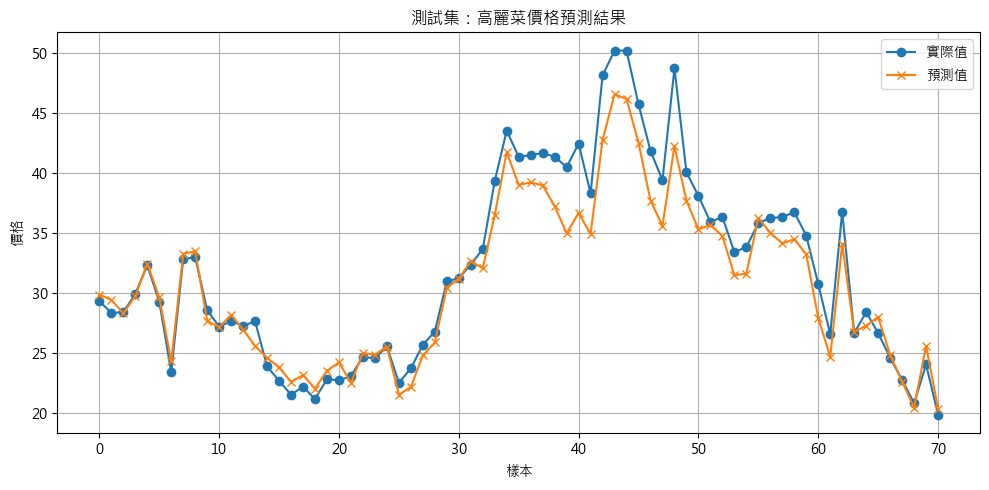

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ==========================================
# 1. 讀取資料並排序（如果有時間欄位 ObsTime）
# ==========================================
df = pd.read_csv('cabbage_price_engineered.csv')
# df = df.sort_values("ObsTime")  # 如果你有時間欄位請取消註解這行

# 2. 分離特徵與目標
X = df.drop(columns=["Cabbage price"])
y = df["Cabbage price"]

# 3. 定義類別欄位（不進行標準化）
categorical_cols = ['typhoon', 'is_weekend', 'is_hot', 'is_cold', 'has_rain', 'extreme_weather']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# ==========================================
# 4. 時間序列切分（前80%為訓練集）
# ==========================================
split_index = int(len(X) * 0.8)
X_train_raw = X.iloc[:split_index].copy()
X_test_raw  = X.iloc[split_index:].copy()
y_train     = y.iloc[:split_index].copy()
y_test      = y.iloc[split_index:].copy()

# ==========================================
# 5. 數值欄位標準化（只用訓練集 fit）
# ==========================================
scaler = StandardScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train_raw[numerical_cols]),
    columns=numerical_cols, index=X_train_raw.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test_raw[numerical_cols]),
    columns=numerical_cols, index=X_test_raw.index
)

# ==========================================
# 6. 類別欄位 One-Hot 編碼（避免洩漏）
# ==========================================
X_train_cat = pd.get_dummies(X_train_raw[categorical_cols], drop_first=False)
X_test_cat = pd.get_dummies(X_test_raw[categorical_cols], drop_first=False)

# 確保測試集欄位對齊
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

# ==========================================
# 7. 合併處理後特徵
# ==========================================
X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

# ==========================================
# 8. PCA（只對訓練資料做 fit）
# ==========================================
optimal_components = 10  # ✅ 可自行調整或改為自動決定
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca  = pca.transform(X_test_processed)

# ==========================================
# 9. 模型訓練與預測
# ==========================================
model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

# ==========================================
# 10. 模型性能評估
# ==========================================
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n=== 模型性能評估 ===")
print(f"訓練集 R²: {train_r2:.4f}")
print(f"測試集 R²: {test_r2:.4f}")
print(f"訓練集 RMSE: {train_rmse:.4f}")
print(f"測試集 RMSE: {test_rmse:.4f}")

# ==========================================
# 11. 預測結果可視化
# ==========================================
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="實際值", marker='o')
plt.plot(y_pred_test, label="預測值", marker='x')
plt.title("測試集：高麗菜價格預測結果")
plt.xlabel("樣本")
plt.ylabel("價格")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# 自動選擇保留 95% 的主成分數
pca_full = PCA().fit(X_train_processed)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
optimal_components = np.argmax(cum_var >= 0.95) + 1
print(f"保留 95% 變異量所需主成分數: {optimal_components}")


保留 95% 變異量所需主成分數: 10


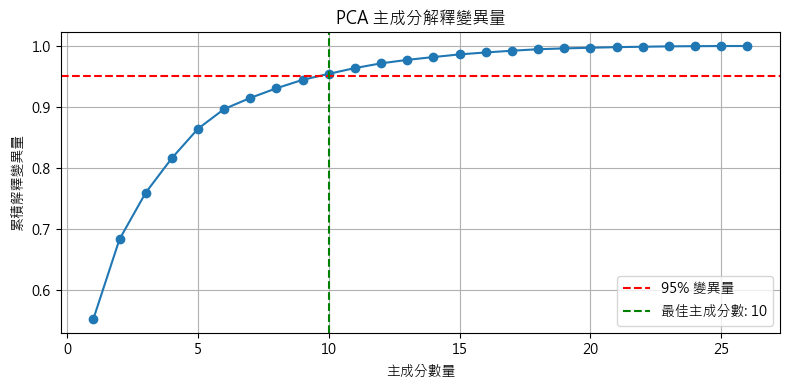

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% 變異量')
plt.axvline(x=optimal_components, color='green', linestyle='--', label=f'最佳主成分數: {optimal_components}')
plt.xlabel('主成分數量')
plt.ylabel('累積解釋變異量')
plt.title('PCA 主成分解釋變異量')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


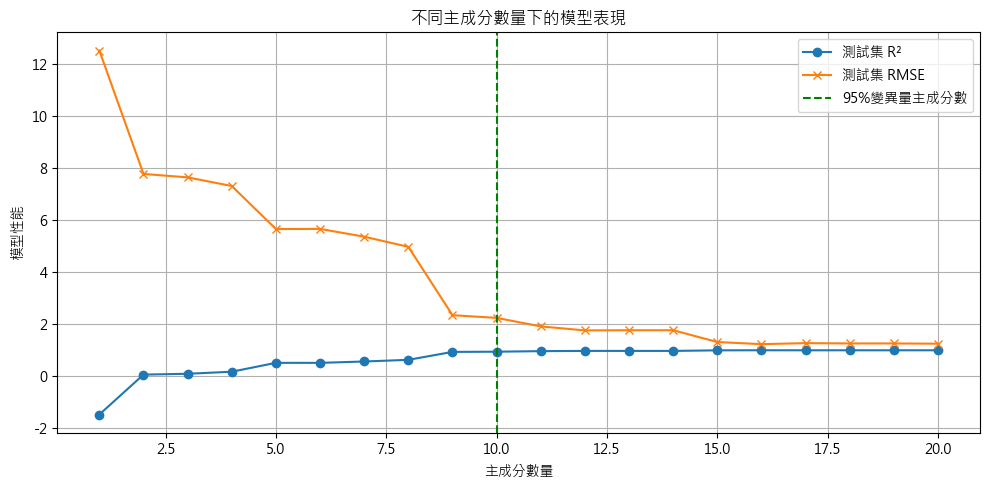

In [23]:
component_range = range(1, 21)
r2_scores = []
rmse_scores = []

for n in component_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_processed)
    X_test_pca = pca.transform(X_test_processed)

    model = LinearRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# 畫圖
plt.figure(figsize=(10, 5))
plt.plot(component_range, r2_scores, marker='o', label='測試集 R²')
plt.plot(component_range, rmse_scores, marker='x', label='測試集 RMSE')
plt.axvline(x=optimal_components, color='green', linestyle='--', label='95%變異量主成分數')
plt.xlabel('主成分數量')
plt.ylabel('模型性能')
plt.title('不同主成分數量下的模型表現')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


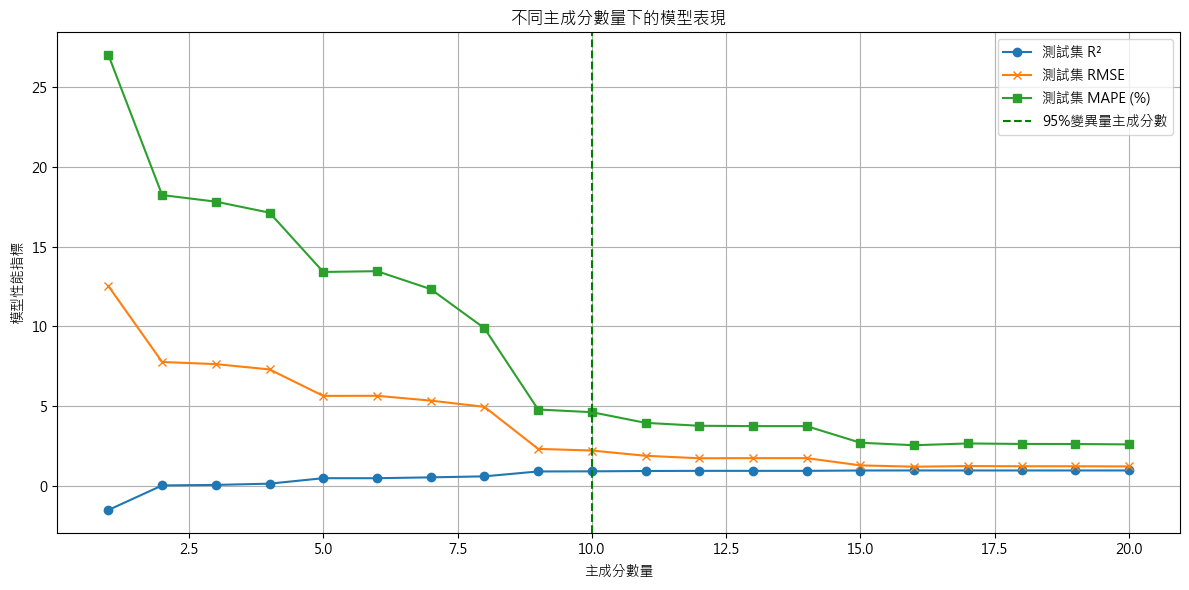

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

component_range = range(1, 21)
r2_scores = []
rmse_scores = []
mape_scores = []

for n in component_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_processed)
    X_test_pca = pca.transform(X_test_processed)

    model = LinearRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred) * 100)  # 百分比%

# 畫圖
plt.figure(figsize=(12, 6))

plt.plot(component_range, r2_scores, marker='o', label='測試集 R²')
plt.plot(component_range, rmse_scores, marker='x', label='測試集 RMSE')
plt.plot(component_range, mape_scores, marker='s', label='測試集 MAPE (%)')

plt.axvline(x=optimal_components, color='green', linestyle='--', label='95%變異量主成分數')
plt.xlabel('主成分數量')
plt.ylabel('模型性能指標')
plt.title('不同主成分數量下的模型表現')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# ==========================================
# 11. 分析主成分的構成（每個主成分對應哪些原始特徵）
# ==========================================
def analyze_component_composition(pca, feature_names, component_idx=0, top_n=10):
    """
    分析指定主成分由哪些原始特徵構成
    :param pca: 已訓練好的 PCA 模型
    :param feature_names: 原始欄位名稱（建議用 X_train_processed.columns）
    :param component_idx: 要分析的主成分編號（從0開始）
    :param top_n: 顯示權重絕對值最大的前N個特徵
    """
    component = pca.components_[component_idx]
    feature_importance = [(abs(weight), feature, weight)
                          for weight, feature in zip(component, feature_names)]
    feature_importance.sort(reverse=True)

    print(f"\n🔍 主成分 PC{component_idx+1} 的主要構成特徵 (前 {top_n} 名):")
    for i, (abs_weight, feature, weight) in enumerate(feature_importance[:top_n]):
        print(f"{i+1:2d}. {feature:30s}: {weight:8.4f} (|{abs_weight:.4f}|)")

# ✅ 使用處理後的欄位名稱進行分析
for i in range(min(10, optimal_components)):  # 只分析前5個主成分（或你實際保留的數量）
    analyze_component_composition(pca, X_train_processed.columns, i, top_n=10)



🔍 主成分 PC1 的主要構成特徵 (前 10 名):
 1. price_ma_7                    :   0.2776 (|0.2776|)
 2. price_ma_14                   :   0.2758 (|0.2758|)
 3. temp_ma_7                     :   0.2731 (|0.2731|)
 4. price_lag_1                   :   0.2703 (|0.2703|)
 5. price_lag_3                   :   0.2700 (|0.2700|)
 6. month_sin                     :  -0.2656 (|0.2656|)
 7. price_lag_7                   :   0.2645 (|0.2645|)
 8. Temperature_lag_1             :   0.2592 (|0.2592|)
 9. temp_squared                  :   0.2590 (|0.2590|)
10. Temperature_lag_3             :   0.2571 (|0.2571|)

🔍 主成分 PC2 的主要構成特徵 (前 10 名):
 1. month_cos                     :   0.5063 (|0.5063|)
 2. dayofyear_cos                 :   0.4026 (|0.4026|)
 3. dayofyear_sin                 :  -0.2995 (|0.2995|)
 4. price_volatility_7d           :   0.2764 (|0.2764|)
 5. Temperature_lag_1             :  -0.2057 (|0.2057|)
 6. Temperature                   :  -0.2042 (|0.2042|)
 7. month_sin                     :  -0.1997 (